In [1]:
# Permet de tout executer au lancement du notebook + conserver le notebook actif pendant 2h
from IPython.display import Javascript
from masquer import *
Javascript("""
function repeter(){
IPython.notebook.kernel.execute("a=1");
}
// execute a = 1 en python toutes les 8 minutes pendant 2h
let timerId = setInterval(() => repeter(), 4800);
setTimeout(() => { clearInterval(timerId); alert('fin de cession'); }, 7200000);

// Supprimer la taille limite pour la sortie d'une cellule
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};
IPython.notebook.kernel.execute("url = '" + window.location + "'");

// Exécuter toutes les cellule du notebook
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            
                
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
                Jupyter.actions.call('jupyter-notebook:hide-header')

        }
    );""")

ModuleNotFoundError: No module named 'masquer'

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
HTML("""<style>
h1 {
  font-family: 'Permanent Marker', cursive;
  text-align: center;
  color: red;
  
}
ol {
  list-style-position: inside;
  margin-left: 1em;
  list-style-position: outside;
}
h2 {
  font-family: 'Permanent Marker', cursive;
  color: blue;
}
h3 {
  font-family: 'Permanent Marker', cursive;

}
</style>""")

# CHAPITRE 3 - Les Tris

## IV. Le quicksort

Il s'agit aussi d'un algorithme basé sur le principe **diviser pour régner**.

Pour réaliser ce tri, on va choisir un **pivot** (dernier élément de la portion de liste considérée dans l'animation ci-dessous). Puis partitionner les différents éléments de la liste en deux populations:
* les éléments supérieurs au pivot (que l'on place à la fin de la portion de lsite considérée)
* les éléments inférieurs au pivot (que l'on place au début de la portion de liste considérée)

Ainsi, on a directement la position finale du pivot.
Il suffit ensuite de recommencer avec chaque portion de liste.

La réalisation de ce tri revient donc à la résolution de deux problèmes de taille inférieure (et donc plus simples) que le problème initial. Le problème du tri d'une liste à 1 élément étant trivial.

![tri rapide](https://upload.wikimedia.org/wikipedia/commons/6/6a/Sorting_quicksort_anim.gif)


### Activité à réaliser
1. Proposer une implémentation de ce tri tel que proposé
2. Modifiez l'algorithme afin de prendre comme pivot
    1. un élément aléatoire de la sous liste considérée
    2. la médiane des 3 premiers éléments de la sous liste (si elle comporte au moins 3 éléments)

In [14]:
# 1.

def quicksort1(L):
    
    if len(L) <= 1:
        return L
    
    else:
        pivot = L[-1]
        L_min = []
        L_max = []
        
        while len(L) > 1:
            if L[0] < pivot:
                L_min.append(L.pop(0))
            else:
                L_max.append(L.pop(0))
        return quicksort1(L_min) + quicksort1(L_max)
    
def quicksort2(L):
    
    n = len(L)
    if n <= 1:
        return L
    
    else:
        pivot = L[-1]
        L_min = []
        L_max = []
        
        for i in range (0, n-1):
            if L[i] < pivot:
                L_min.append(L[i])
            else:
                L_max.append(L[i])
                
        return quicksort2(L_min) + quicksort2(L_max)

In [5]:
# 2.A.
import random

def quickrandom(L):
    
    n = len(L)
    if n <= 1:
        return L
    
    else:
        i = random.randint(0, n-1)
        
        pivot = L[i]
        L_min = []
        L_max = []
        
        L[i], L[-1] = L[-1], L[i]
        
        for i in range (0, n-1):
            if L[i] < pivot:
                L_min.append(L[i])
            else:
                L_max.append(L[i])
                
        return quickrandom(L_min) + quickrandom(L_max)

In [12]:
# 2.B.

def mediane(L):
    """
    L est une liste de 3 éléments
    """
    assert len(L) == 3
    
    a, b , c = 0, 1, 2
    if L[b] < L[a]:
        a, b = b, a
        
    if L[c] < L[a]:
        return a
    elif L[c] > L[b]:
        return b
    else:
        return c
    
def quickmed(L):
    
    n = len(L)
    if n <= 1:
        return L
    
    else:
        L_min = []
        L_max = []
        
        if n >= 3:
            i = mediane(L[:3])
            pivot = L[i]
            L[i], L[-1] = L[-1], L[i]
        
        else:
            pivot = L[-1]
        
        for i in range (0, n-1):
            
            if L[i] < pivot:
                L_min.append(L[i])
            else:
                L_max.append(L[i])
                
        return quickmed(L_min) + quickmed(L_max)

Regardez la vidéo ci-dessous:

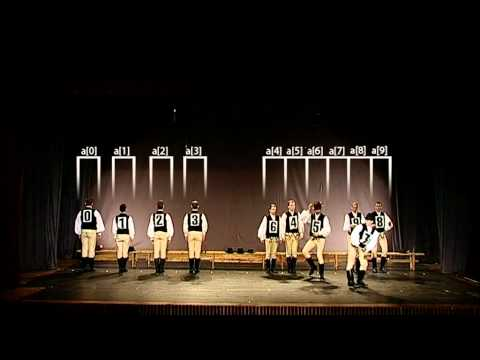

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo("ywWBy6J5gz8",width="640px", height="315px")


### Activité à réaliser
3. Proposez une implémentation de l'algorithme proposé dans cette vidéo

In [ ]:
# 3.

def quicksort3(L, d = 0, f = None):

    if f is None:
        f = len(L) - 1 # Défini f en tant que dernier index du tri si f n'est pas défini
        
    if f - d <= 0:
        return L # Si le tri est terminé
    
    else:
        piv = d # Défini le Pivot
        i = f # Défini le début du Tri
        sens = -1 # On commence en sens inverse
        
        while i != piv: # Tant qu'on a pas fini de trier ce pivot (parceque on alterne droite / gauche)
            
            if L[piv]*sens < L[i]*sens :
            # Compare les valeurs de L[piv] et L[i]. Si inférieur ou supérieur à la fois avec "* sens"
            
                L[i], L[piv] = L[piv], L[i] # Echange la position des deux éléments
                piv, i = i, piv # Echange donc l'index du début du tri et du pivot
                sens = -sens # On change de sens (Droite à Gauche ou Gauche à Droite)
                
            i += sens # Continue le tri
            
        L = quicksort3(L, d = d, f = piv - 1)
        # (L_min) Recommence le tri avec pivot à L[0] et début du tri au pivot précédent - 1
        
        L = quicksort3(L, d = piv + 1, f = f)
        # (L_max) Recommence le tri avec pivot au pivot précédent + 1 et début du tri au dernier élément
        
        return L
        

4. Réalisez une étude sur le temps d'exécution de ces tris pour une liste tirée aléatoirement.
5. Même question dans le cas d'une liste peu mélangée.

In [7]:
import random

def melange(n, p):
    L = [i + 1 for i in range(n)]
    
    for i in range(p):
        a = random.randint(0, n-1)
        b = random.randint(0, n-1)
        L[a], L[b] = L[b], L[a]
        
    return L

In [3]:
import matplotlib.pyplot as plt
from time import *

def trace(f, n, p):
    """
    Fonction trace prenant en argument f, n, p type: int
    
    """
    L = melange(n, p) #on créer une liste a partir de melange()
    listes = [L[:(i*n)//16] for i in range(1,17)] #on créer plein de sous-listes
    x = [(i*n)//16 for i in range(1,17)]
    y = [] # liste qui stoqie les temps d'éxecutions
    
    for i in range(16): #chronométrage
        temps = 0
        for j in range(5): #chronometre 5 fois pour en faire une moyenne
            l = listes[i][:]
            t = time()
            f(l)
            temps += time() -t
        temps = temps / 5 # moyenne
        y.append(temps) # ajoute le temps moyen a temps
    plt.plot(x,y,"+")
    plt.show()
    

In [ ]:
import sys
sys.setrecursionlimit(20000)

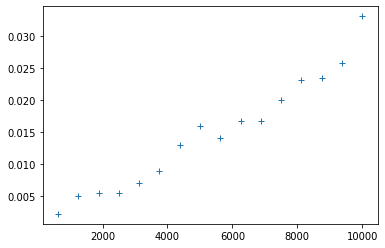

In [20]:
# trace(quicksort2, 10000, 10000)

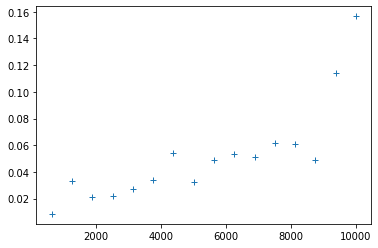

In [21]:
# trace(quicksort2, 10000, 1000)

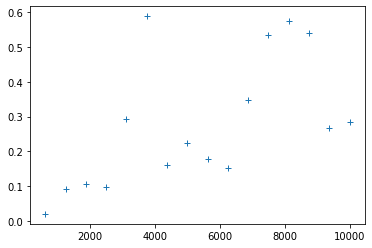

In [22]:
# trace(quicksort2, 10000, 100)

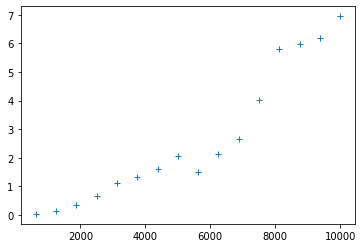

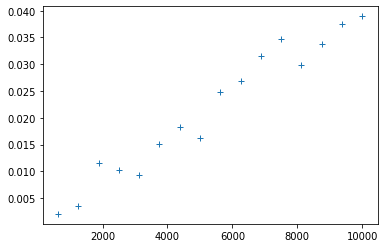

In [19]:
#trace(quickrandom, 5000, 5000)

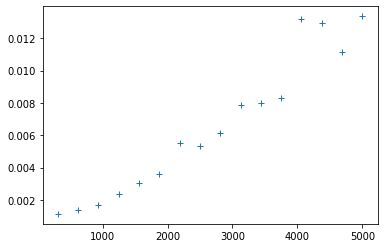

In [17]:
#trace(quickmed, 5000, 5000)

4 & 5.

Cette méthode de "Diviser pour régner" est très peu éfficace avec un liste déjà plus ou moins triée.
On triera beaucoup de fois  inutilement car la liste est déjà triée. (Très efficace sur Liste non triée)

Lorsqu'il y à plusieur fois le même nombre dans la liste, on triera plusieur fois le même nombre de la même manière


In [5]:
def quicksort4(L):
    
    n = len(L)
    if n <= 1:
        return L
    
    else:
        pivot = L[-1]
        L_min = []
        L_max = []
        L_same = [] # On ajoute une liste pour les éléments égaux au pivot
        
        for i in range (0, n-1):
            if L[i] == pivot: # Si égaux au pivot
                L_same.append(L[i])
            elif L[i] < pivot:
                L_min.append(L[i])
            else:
                L_max.append(L[i])
                
        return quicksort2(L_min) + L_same + quicksort2(L_max)

6. Modifier la fonction mélange afin qu'elle permette de controler le combre de fois qu'apparait chaque entier dans la liste mélangée.

In [ ]:
# 6.


7. Que se passe-t-il pour l'algorithme de quicksort quand on se retrouve dans le cas où chaque nombre apparaît un grand nombre de fois ? Le vérifier avec une étude temporelle.

In [2]:
# 7.


8. Proposer une version du quick sort avec une partition en trois listes:
    * les éléments inférieurs au pivot
    * les éléments supérieurs au pivot
    * les éléments égaux au pivot

Qu'apporte ce genre d'implémentation dans le cas de la question 7. ?

In [3]:
# 8.
